In [225]:
%matplotlib inline  
import collections
import csv
import glob
import itertools
import matplotlib.pyplot as plt
import numpy as np
import optparse

In [226]:
parser = optparse.OptionParser()
parser.add_option("--system", dest="system");
parser.add_option("--strategy", dest="strategy");

In [227]:
Benchmark = collections.namedtuple('Benchmark', ['name', 'size', 'time'])

In [256]:
name2opts = {}
benchmarks = collections.defaultdict(lambda: [])
for log in glob.glob('benchmarks/*.log'):
    with open(log, 'r') as logfile:
        reader = csv.reader(logfile)
        for benchmark in reader:
            opts = parser.parse_args(benchmark[0].split())[0]
            name = "{} ({})".format(opts.system, opts.strategy)
            name2opts[name] = opts
            size = int(benchmark[1])
            time = float(benchmark[2])
            benchmarks[name].append(Benchmark(name, size, time))

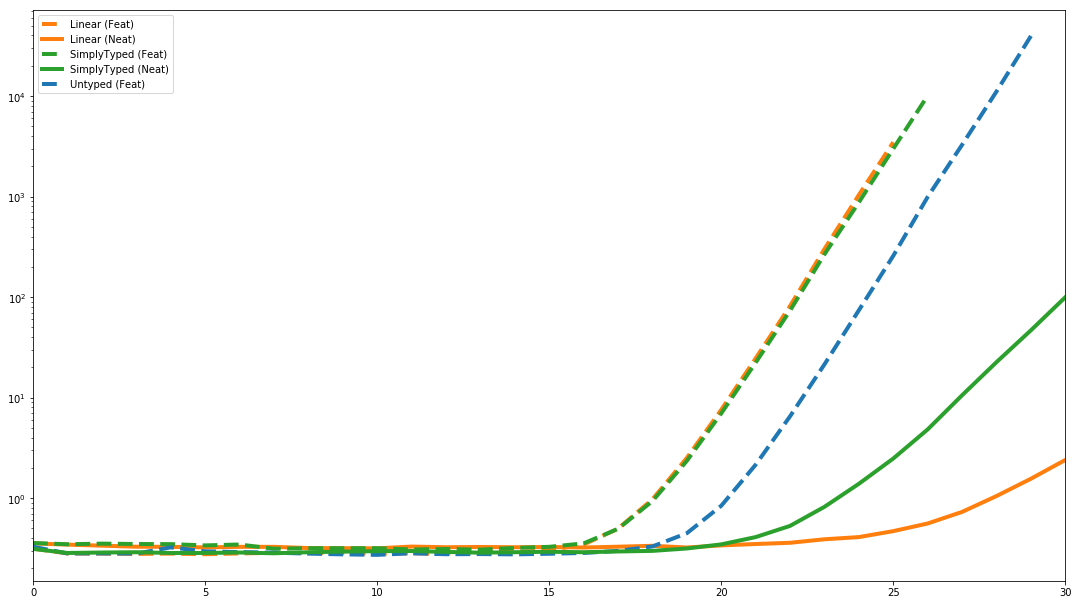

In [257]:
linecolor = {'Untyped':'C0', 'SimplyTyped':'C2', 'Linear':'C1'}
linestyle = {'Feat':'--', 'Neat':'-'}

for label, data in benchmarks.items():
    data.sort(key=lambda b: b.size)
    data = [benchmark.time for benchmark in data]
    line = linecolor[name2opts[label].system] + linestyle[name2opts[label].strategy]
    plt.plot(data, line, label=label, linewidth=4)
plt.xlim(0,30)
plt.gcf().set_size_inches(18.5, 10.5)
plt.gca().set_yscale('log')
labels = zip(*sorted(list(zip(*plt.gca().get_legend_handles_labels())),key=lambda x: x[1]))
plt.legend(*labels, loc='upper left')
plt.show()